In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

# Paths to data files
train_csv = os.path.expanduser("data/df_cleaned_20250617.csv")
pred_csv  = "data/prediction_nb_t500r500.csv"

# Load and preprocess training data
df_train = pd.read_csv(train_csv, parse_dates=['timestamp'])
df_train = df_train.dropna(subset=['ground_truth'])  # only actual observations

# Load prediction results
df_pred = pd.read_csv(pred_csv, parse_dates=['timestamp'])

# Convert the seconds‐since‐epoch column to datetime
df_pred['timestamp'] = pd.to_datetime(df_pred['timestamp'], unit='s')
df_pred['date'] = df_pred['timestamp'].dt.date
df_pred['timestamp'] = pd.to_datetime(df_pred['timestamp'])

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/3482231376.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pred = pd.read_csv(pred_csv, parse_dates=['timestamp'])
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/3482231376.py:15: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_pred['timestamp'] = pd.to_datetime(df_pred['timestamp'], unit='s')


In [81]:
df_train.columns

Index(['timestamp', 'bboxid', 'GEOID', 'geometry_bbox', 'center_latlon', 'max',
       'min', 'precipitation', 'total_population', 'white_ratio',
       'black_ratio', 'hh_median_income', 'count', 'category',
       'predicted_count_upper', 'predicted_count_lower',
       'predicted_count_lower_90', 'predicted_count_upper_90'],
      dtype='object')

In [84]:
df_train['precipitation'].max()

5.46

<Axes: >

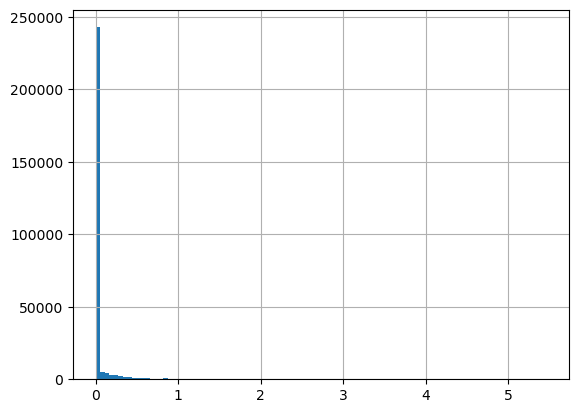

In [ ]:
df_train['precipitation'].hist(bins=100)

In [78]:
df_pred.shape

(13189054, 21)

In [5]:
# Paths to data files
pred_csv2  = "data/prediction_nb_t300r700.csv"

# Load prediction results
df_pred2 = pd.read_csv(pred_csv2, parse_dates=['timestamp'])

# Convert the seconds‐since‐epoch column to datetime
df_pred2['timestamp'] = pd.to_datetime(df_pred2['timestamp'], unit='s')
df_pred2['date'] = df_pred2['timestamp'].dt.date
df_pred2['timestamp'] = pd.to_datetime(df_pred2['timestamp'])

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/653239275.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pred2 = pd.read_csv(pred_csv2, parse_dates=['timestamp'])
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/653239275.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_pred2['timestamp'] = pd.to_datetime(df_pred2['timestamp'], unit='s')


In [6]:
print(df_train['ground_truth'].max())
print(df_pred['predicted_count_mean'].max())
print(df_pred2['predicted_count_mean'].max())

print(df_train['ground_truth'].min())
print(df_pred['predicted_count_mean'].min())
print(df_pred2['predicted_count_mean'].min())

15.0
1665.7542
1208.3414
0.0
0.40426856
0.4589061


In [9]:
df_train.head()

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,black_ratio,hh_median_income,ground_truth
313,2016-11-09,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",73.0,58.0,0.0,506,0.806324,0.000000,53438.0,0.0
314,2016-11-10,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",74.0,60.0,0.0,506,0.806324,0.000000,53438.0,0.0
2141,2016-11-10,bbox_10_15,60750332043,POLYGON ((-122.48444469610592 37.7191324443233...,"(37.71985369613769, -122.4835266585265)",74.0,60.0,0.0,1852,0.266199,0.075054,77813.0,0.0
3967,2016-11-09,bbox_10_16,60750332043,POLYGON ((-122.48261869150517 37.7191244450116...,"(37.719845682477825, -122.48170063648698)",73.0,58.0,0.0,1852,0.266199,0.075054,77813.0,0.0
3968,2016-11-10,bbox_10_16,60750332043,POLYGON ((-122.48261869150517 37.7191244450116...,"(37.719845682477825, -122.48170063648698)",74.0,60.0,0.0,1852,0.266199,0.075054,77813.0,0.0


In [12]:
df_train.sort_values(by='ground_truth', ascending=False).head()

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,black_ratio,hh_median_income,ground_truth
4601113,2017-12-28,bbox_45_60,60750607021,POLYGON ((-122.40186682742237 37.7695109177372...,"(37.77023150842231, -122.40094736798409)",62.0,47.0,0.00,1203,0.489609,0.031588,143805.278956,15.0
3603802,2018-08-16,bbox_38_46,60750206011,POLYGON ((-122.42752622042356 37.7594846869566...,"(37.76020548213584, -122.42660713274103)",66.0,57.0,0.00,1018,0.761297,0.000000,111250.000000,15.0
3620629,2019-09-04,bbox_38_54,60750228012,POLYGON ((-122.41291041324061 37.7594127828337...,"(37.76013346286281, -122.41199118612882)",69.0,57.0,0.00,1596,0.591479,0.013158,163578.000000,13.0
4335856,2017-01-20,bbox_43_51,60750177002,POLYGON ((-122.4183345409265 37.76669230562378...,"(37.76741302676507, -122.41741527486104)",55.0,45.0,1.05,1608,0.457090,0.021144,142273.000000,13.0
4473204,2017-12-09,bbox_44_60,60750607021,POLYGON ((-122.40187851063611 37.7680604541887...,"(37.76878104529547, -122.40095906946031)",65.0,49.0,0.00,1203,0.489609,0.031588,143805.278956,13.0


In [10]:
df_pred.head(2)

,timestamp,bboxid,GEOID,geometry_bbox,center_latlon,max,min,precipitation,total_population,white_ratio,...,hh_median_income,ground_truth,latitude,longitude,predicted_count_mean,predicted_count_lower,predicted_count_upper,predicted_count_lower_90,predicted_count_upper_90,date
0,2016-01-01,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",50.0,40.0,0.0,506,0.806324,...,53438.0,NaN,37.719862,-122.485353,10.893979,0.0,103.0,0.0,33.000000,2016-01-01
1,2016-01-02,bbox_10_14,60750604002,POLYGON ((-122.4862707014277 37.71914041535512...,"(37.71986168151697, -122.48535268128838)",51.0,45.0,0.0,506,0.806324,...,53438.0,NaN,37.719862,-122.485353,4.323418,0.0,42.0,0.0,20.050781,2016-01-02


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Paths to data files
train_csv = os.path.expanduser("data/df_cleaned_20250617.csv")
pred_csv  = "data/prediction_nb_t500r500.csv"

# Load and preprocess training data
df_train = pd.read_csv(train_csv, parse_dates=['timestamp'])
df_train = df_train.dropna(subset=['ground_truth'])  # only actual observations

# Load prediction results
df_pred = pd.read_csv(pred_csv, parse_dates=['timestamp'])

# Convert the seconds‐since‐epoch column to datetime
df_pred['timestamp'] = pd.to_datetime(df_pred['timestamp'], unit='s').dt.date

# Rename columns for consistency
df_train.rename(columns={'ground_truth': 'count'}, inplace=True)
df_pred.rename(columns={'predicted_count_mean': 'count'}, inplace=True)

# Add a 'category' column to distinguish between training and prediction data
df_train['category'] = 'train'
df_pred['category'] = 'prediction'

# Create a empty columns to combine two dataframes
df_train['predicted_count_upper'] = np.nan
df_train['predicted_count_lower'] = np.nan
df_train['predicted_count_lower_90'] = np.nan
df_train['predicted_count_upper_90'] = np.nan

# Combine the two dataframes
df_combined = pd.concat([df_train, df_pred], ignore_index=True)

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/1905025103.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pred = pd.read_csv(pred_csv, parse_dates=['timestamp'])
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/1905025103.py:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_pred['timestamp'] = pd.to_datetime(df_pred['timestamp'], unit='s').dt.date


In [35]:
# Convert 'timestamp' to datetime
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])

In [39]:
df_combined['timestamp'].nunique(), df_combined['timestamp'].min(), df_combined['timestamp'].max()

(3074, Timestamp('2016-01-01 00:00:00'), Timestamp('2024-05-31 00:00:00'))

In [40]:
df_combined.sort_values(by='timestamp', inplace=True)

In [42]:
# Plot time-series
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_combined['timestamp'], 
    df_combined['count'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_combined['timestamp'],
    df_combined['predicted_count_lower_90'],
    df_combined['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='90% CI'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/3726044087.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/wooyongjung/miniconda3/envs/homeless_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [44]:
df_3846 = df_combined[df_combined['bboxid'] == 'bbox_38_46'].copy()

In [45]:
df_3846.shape

(3074, 21)

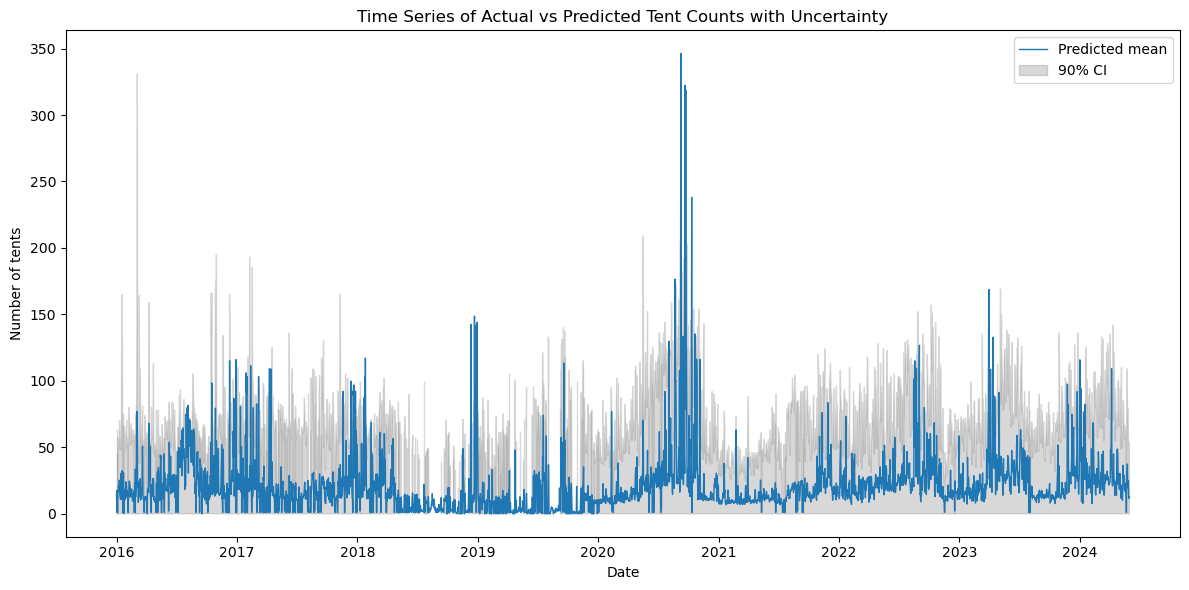

In [46]:
# Plot time-series
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3846['timestamp'], 
    df_3846['count'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3846['timestamp'],
    df_3846['predicted_count_lower_90'],
    df_3846['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='90% CI'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
df_train['timestamp'].min()

Timestamp('2016-01-01 00:00:00')

In [54]:
df_3846_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 40153 to 215212
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   timestamp                 489 non-null    datetime64[ns]
 1   bboxid                    489 non-null    object        
 2   GEOID                     489 non-null    int64         
 3   geometry_bbox             489 non-null    object        
 4   center_latlon             489 non-null    object        
 5   max                       489 non-null    float64       
 6   min                       489 non-null    float64       
 7   precipitation             489 non-null    float64       
 8   total_population          489 non-null    int64         
 9   white_ratio               489 non-null    float64       
 10  black_ratio               489 non-null    float64       
 11  hh_median_income          489 non-null    float64       
 12  count               

ConversionError: Failed to convert value(s) to axis units: '2016-01-01 00:00:00'

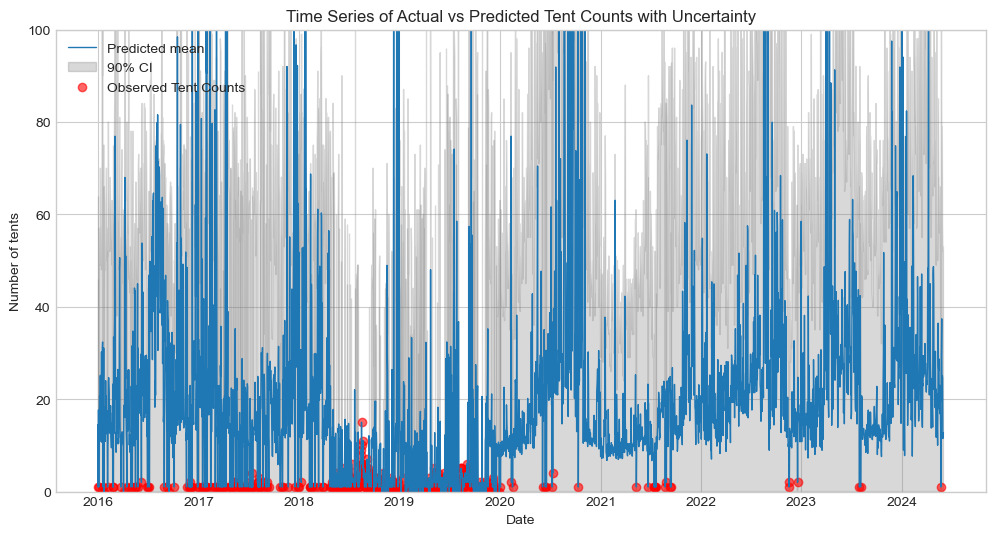

In [89]:
df_3846_train = df_3846[df_3846['category'] == 'train'].copy()

# Plot time-series
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3846['timestamp'], 
    df_3846['count'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3846['timestamp'],
    df_3846['predicted_count_lower_90'],
    df_3846['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='90% CI'
)

plt.scatter(
    df_3846_train['timestamp'], 
    df_3846_train['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()
plt.ylim(0,100)
plt.xlim('2016-01-01 00:00:00', '2016-05-31 00:00:00')

plt.tight_layout()
plt.show()

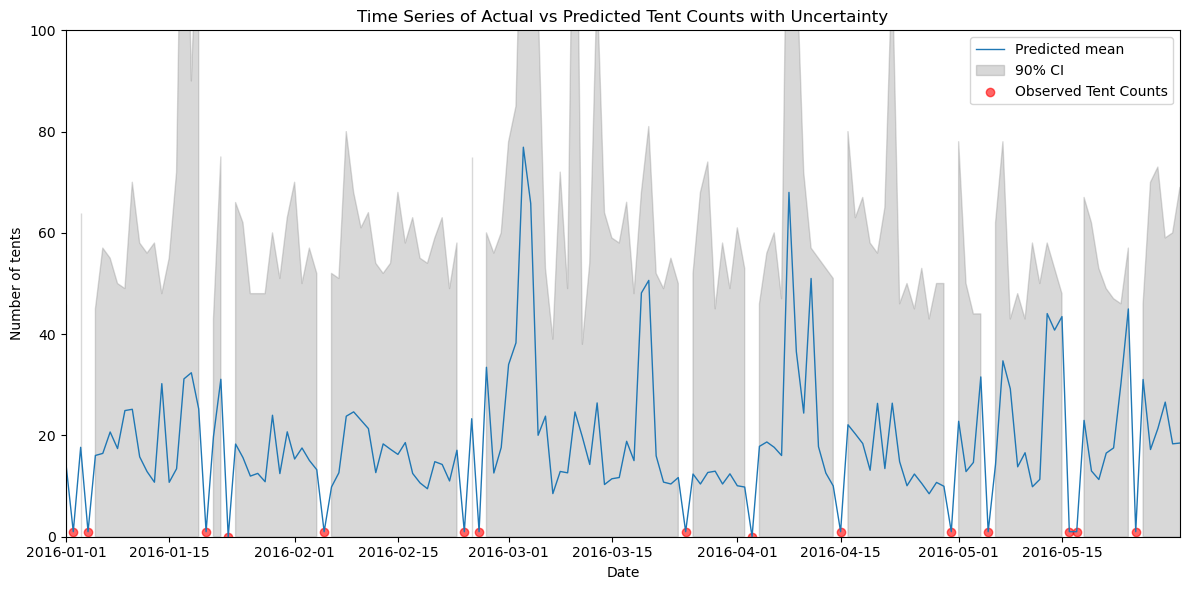

In [ ]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2016, 1, 1)
end_date = dt.datetime(2016, 5, 31)

lowess_smoothed = sm.nonparametric.lowess(
    df_3846['count'], 
    df_3846['timestamp'].astype(int) / 10**9,
    frac=0.1,
    return_sorted=True
)

timestamp_smoothed, count_smoothed = lowess_smoothed.T

# Plot time-series
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3846['timestamp'], 
    df_3846['count'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3846['timestamp'],
    df_3846['predicted_count_lower_90'],
    df_3846['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='90% CI'
)

plt.scatter(
    df_3846_train['timestamp'], 
    df_3846_train['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()
plt.ylim(0,100)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

In [58]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 32.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [61]:
df_3846['timestamp'].astype(int) / 10**9

3834683     1.451606e+09
40153       1.451693e+09
3834684     1.451779e+09
40154       1.451866e+09
3834685     1.451952e+09
                ...     
10517538    1.716768e+09
10517539    1.716854e+09
10517540    1.716941e+09
10517541    1.717027e+09
10517542    1.717114e+09
Name: timestamp, Length: 3074, dtype: float64

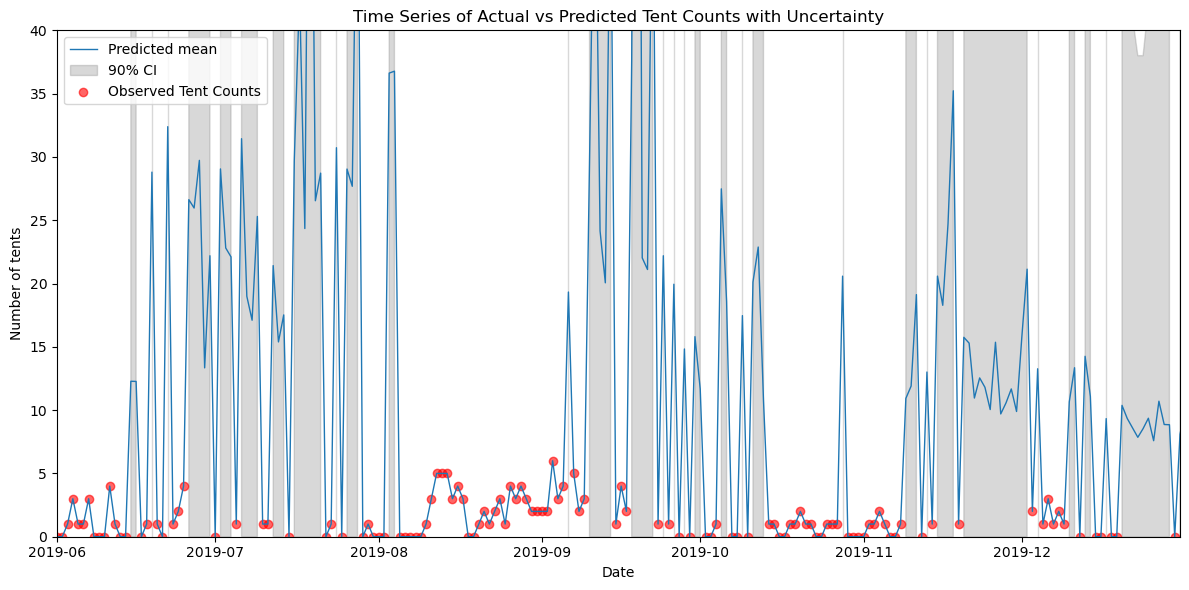

In [88]:
import datetime as dt
import statsmodels.api as sm

start_date = dt.datetime(2019, 6, 1)
end_date = dt.datetime(2019, 12, 31)

lowess_smoothed = sm.nonparametric.lowess(
    df_3846['count'], 
    df_3846['timestamp'].astype(int) / 10**9,
    frac=0.001,
    return_sorted=True
)

df_3846['smoothed_count'] = lowess_smoothed[:, 1]


# Plot time-series
plt.figure(figsize=(12, 6))

# Predicted mean
plt.plot(
    df_3846['timestamp'],
    df_3846['smoothed_count'], 
    label='Predicted mean', 
    linewidth=1
)

# Uncertainty band
plt.fill_between(
    df_3846['timestamp'],
    df_3846['predicted_count_lower_90'],
    df_3846['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='90% CI'
)

plt.scatter(
    df_3846_train['timestamp'], 
    df_3846_train['count'], 
    label='Observed Tent Counts', 
    alpha=0.6, 
    marker='o',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()
plt.ylim(0,40)
plt.xlim(start_date, end_date)

plt.tight_layout()
plt.show()

/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/4219608617.py:1: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(
/var/folders/y6/z9h695vx2w3gbjh7z32h4j9m0000gn/T/ipykernel_61013/4219608617.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(


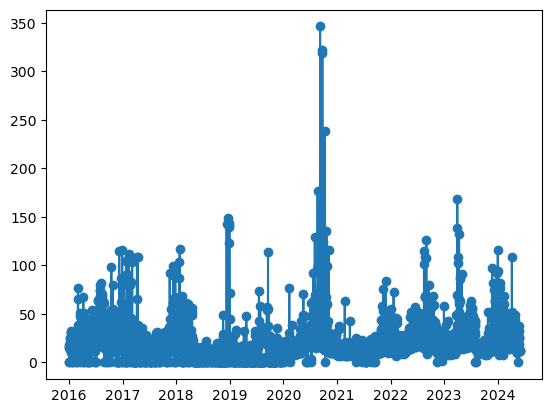

In [75]:
plt.plot_date(
    df_3846['timestamp'], 
    df_3846['smoothed_count'], 
    linestyle='-', 
    marker='o', 
    label='Smoothed Count'
)

In [77]:
13189054 / (60*60*60)

61.060435185185185

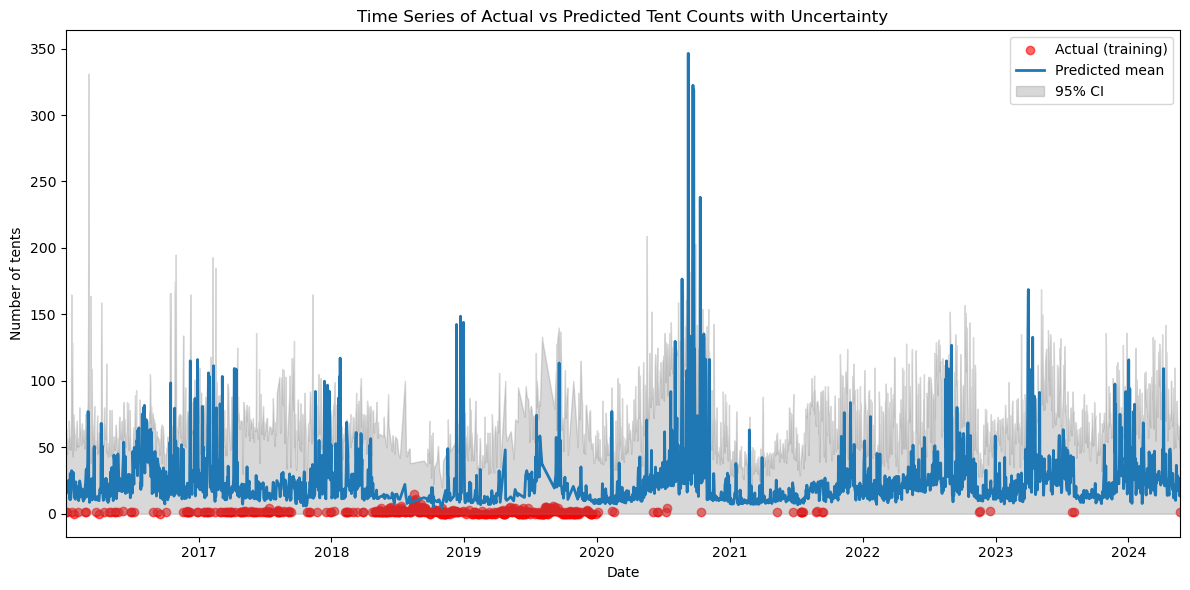

In [ ]:
# Plot time-series
plt.figure(figsize=(12, 6))

# Actual data
plt.scatter(
    df_train_3846['timestamp'], 
    df_train_3846['ground_truth'], 
    label='Actual (training)', 
    alpha=0.6, 
    marker='o',
    color='red'
)

# Predicted mean
plt.plot(
    df_pred_3846['timestamp'], 
    df_pred_3846['predicted_count_mean'], 
    label='Predicted mean', 
    linewidth=2
)

# Uncertainty band
plt.fill_between(
    df_pred_3846['timestamp'],
    df_pred_3846['predicted_count_lower_90'],
    df_pred_3846['predicted_count_upper_90'],
    color='gray',
    alpha=0.3,
    label='95% CI'
)

plt.xlabel('Date')
plt.ylabel('Number of tents')
plt.title('Time Series of Actual vs Predicted Tent Counts with Uncertainty')
plt.legend()
# Only show the 2017
plt.ylim(0, 100)  # Adjust y-axis limits based on data
plt.xlim(a2016-01-01df_train_3846['timestamp'].min(), df_train_3846['timestamp'].max())
plt.tight_layout()
plt.show()